In [10]:
 # set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [14]:
from Utils.load_data import x_train, x_test, train_ds, test_ds, image_dim

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Layer
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

# Setup basic layers

In [69]:
latent_representation_dim = 2

In [70]:
conv1 = Conv2D(32, 3, activation='relu')
flatten = Flatten()
distribution_layer = Dense(tfp.layers.IndependentNormal.params_size(latent_representation_dim), tfp.layers.IndependentNormal(latent_representation_dim))

In [97]:
batch_size=100
minitest = x_test[0:batch_size, :, :]
dist = distribution_layer(flatten(conv1(minitest)))

In [98]:
dist.shape

TensorShape([100, 2])

In [99]:
dist.mean()[0, :], dist.variance()[0, :]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.03470104,  0.00078135], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.52435863, 0.5008703 ], dtype=float32)>)

In [100]:
class Encoder(Layer):
    def __init__(self, latent_representation_dim=2):
        super(Encoder, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.distribution_layer = Dense(tfp.layers.IndependentNormal.params_size(latent_representation_dim), 
                                        tfp.layers.IndependentNormal(latent_representation_dim))
    
    def normal_output(self, inputs):
        x = self.conv1(inputs)
        x = self.flatten(x)
        dist = self.distribution_layer(x)
        return dist

In [101]:
encoder = Encoder()

In [102]:
encoder.normal_output(minitest).shape

TensorShape([100, 2])

In [107]:
x_test[0, :, :].shape

(28, 28, 1)

In [132]:
point_repeat = np.zeros((1000, 28,28,1))
point_repeat[:, :, :, :] = x_test[0, :, :]

In [133]:
print(np.sum(point_repeat[0, :, :, :] == x_test[0, :, :]), 28*28)
print(point_repeat[0, 0, 0, 0], x_test[0, 0, 0])

784 784
0.0 [0.]


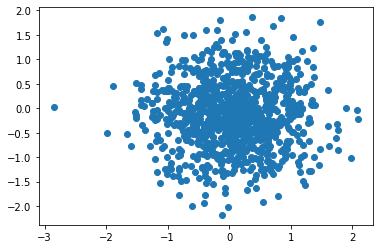

In [134]:
plt.scatter(encoder.normal_output(point_repeat).sample()[:, 0], encoder.normal_output(point_repeat).sample()[:, 1])